In [3]:
import sys

sys.path.append('..')
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
name = 'tiny_ss_ft_freeze'
types = ['train', 'val', 'test']
metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1', 'wer']

path = f'../results/{name}'
with open(f'{path}_confusion.txt', 'r') as f:
  confusion = np.array(ast.literal_eval(f.read()))

df = pd.read_csv(f'{path}.csv')
df.head()

,epoch,type,loss,accuracy,precision,recall,f1,wer
0,0,train,2.945873,0.097769,0.849464,0.097769,0.076140,108.324162
1,0,val,2.973222,0.100158,0.847276,0.100158,0.079449,103.899543
2,1,train,2.359474,0.465265,0.857456,0.465265,0.567140,24.232814
3,1,val,2.372193,0.462161,0.856388,0.462161,0.563930,25.502913
4,2,train,2.072291,0.267816,0.851399,0.267816,0.328981,69.812377


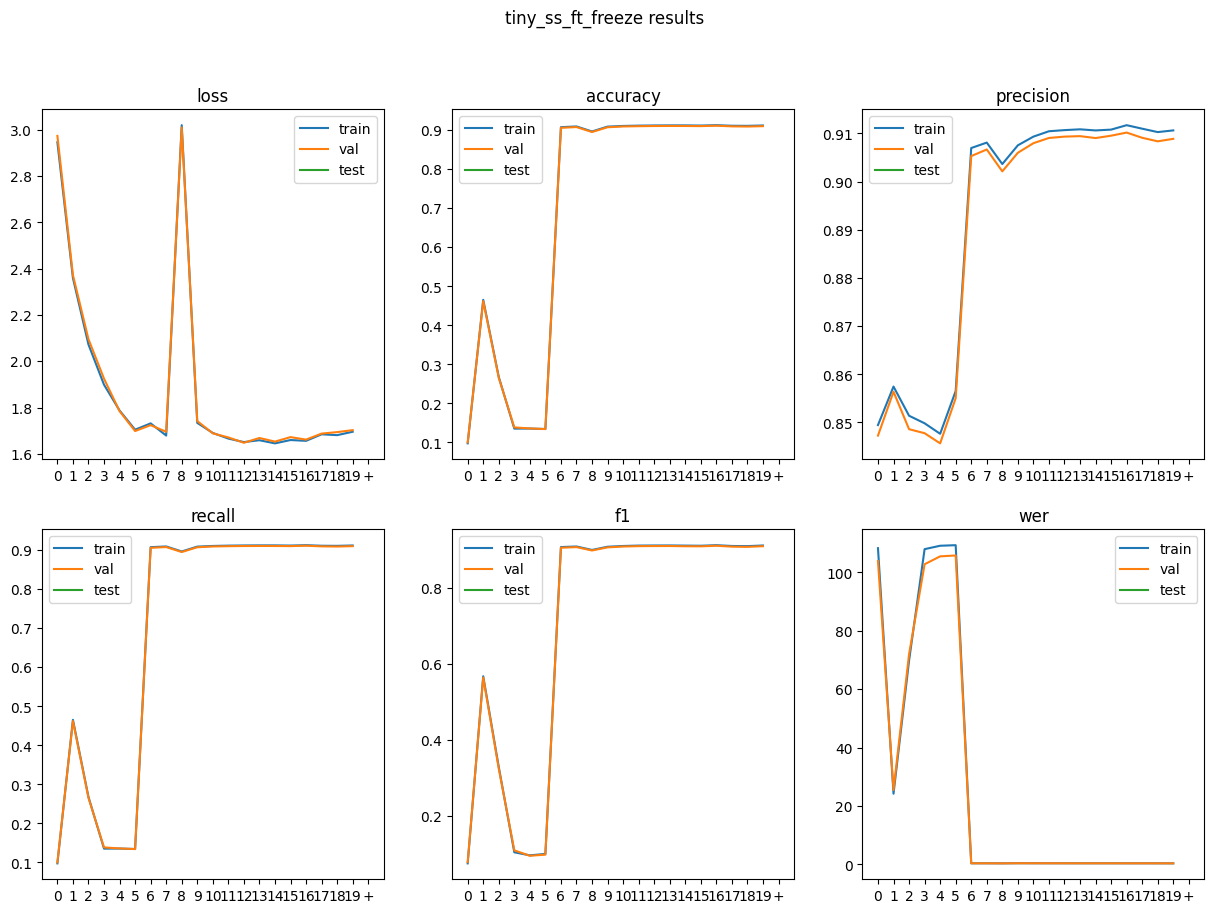

In [51]:
# plot metrics in grid
# epoch, type, loss, accuracy, precision, recall, f1, wer
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f'{name} results')
for i, metric in enumerate(metrics):
  ax = axs[i // 3, i % 3]
  for t in types:
    ax.plot(df[df.type == t].epoch, df[df.type == t][metric], label=t)
  ax.set_title(metric)
  ax.legend()
plt.show()

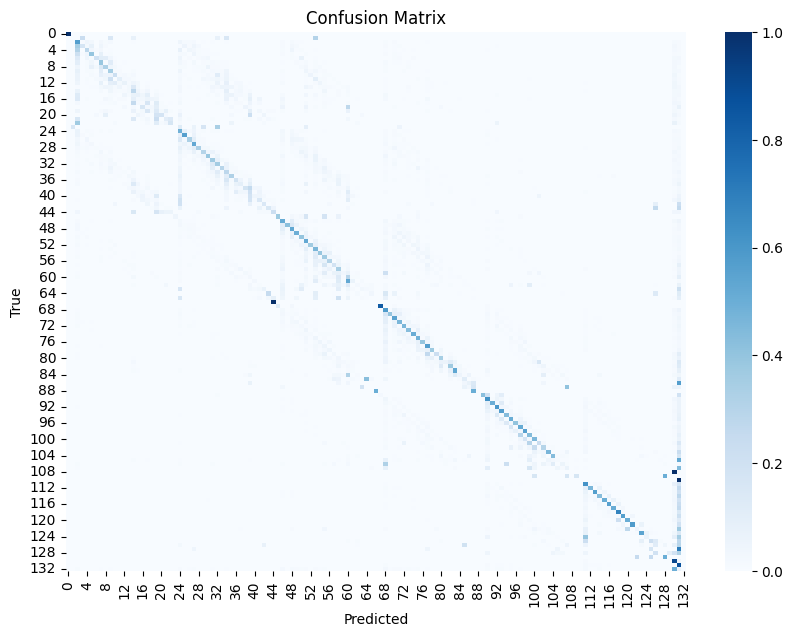

In [52]:
confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()